# Assignment 2

### Part 1 The Search Problem

In [1]:
import requests
import re
import pandas as pd

爬取上海地铁站经纬度信息

In [2]:
url_geo = 'http://service.shmetro.com/skin/js/pca.js'

In [3]:
user_agent_geo = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
header_geo = {'User-Agent':user_agent_geo}
response_geo = requests.get(url_geo,headers=header_geo).content.decode('utf-8')

In [4]:
what_i_want_geo = r'var gis = {(.*?)}'
pattern_geo = re.compile(what_i_want_geo)
likes_geo = pattern_geo.findall(response_geo)
# print(likes)
new_likes =  re.split(('[:'',]'), likes_geo[0])
station_geo = {}
station_id = new_likes[::3]
long = new_likes[1::3]
lat = new_likes[2::3]

for i in range(int(len(new_likes)/3)):
    station_id[i] = station_id[i].strip('"')
    long[i] = float(long[i].lstrip('"'))
    lat[i] = float(lat[i].rstrip('"'))
    station_geo[station_id[i]] = (long[i], lat[i])

爬取上海地铁站站名信息

In [5]:
url_name = 'http://marketing.cyberspaceit.cn/core/shmetro/mdstationinfoback_new.ashx?act=getAllStations'

In [6]:
user_agent_name = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
header_name = {'User-Agent':user_agent_name}
response_name = requests.get(url_name,headers=header_name).content.decode('utf-8')
# response_name

In [7]:
# what_i_want_name = r'{"key":"([0-9]+)","value":"([0-9\u4e00-\u9fa5]+)\s?"}'
what_i_want_name = r'{"key":"([0-9]+)","value":"(\w+\(?\w+?\)?)\s?"}'
pattern_name = re.compile(what_i_want_name)
likes_name = pattern_name.findall(response_name)
# print(likes_name)
station = {}
for id, name in likes_name:
#     print(id)
    station[id] = name

In [8]:
station

{'0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',
 '0312': '石龙路',
 '

In [10]:
from collections import defaultdict

In [11]:
station_geo_new = defaultdict(list)
for key in station_geo.keys(): 
    t = station[key]
    station_geo_new[t] = station_geo[key]

In [12]:
station_geo_new

defaultdict(list,
            {'莘庄': (121.391832, 31.116809),
             '外环路': (121.399814, 31.126929),
             '莲花路': (121.409334, 31.136734),
             '锦江乐园': (121.42068, 31.148312),
             '上海南站': (121.437159, 31.159648),
             '漕宝路': (121.44187, 31.175383),
             '上海体育馆': (121.443402, 31.188814),
             '徐家汇': (121.442314, 31.201202),
             '衡山路': (121.453247, 31.211777),
             '常熟路': (121.456628, 31.219964),
             '陕西南路': (121.464494, 31.220991),
             '黄陂南路': (121.479798, 31.228753),
             '人民广场': (121.481738, 31.238695),
             '新闸路': (121.474802, 31.244699),
             '汉中路': (121.465, 31.247808),
             '上海火车站': (121.46396, 31.255155),
             '中山北路': (121.465616, 31.265275),
             '延长路': (121.461893, 31.27806),
             '上海马戏城': (121.458503, 31.285845),
             '汶水路': (121.456458, 31.29917),
             '彭浦新村': (121.455097, 31.312943),
             '共康路': (121.453464, 

爬取每条线路经过的站

In [13]:
url_line = 'http://service.shmetro.com/skin/js/pca.js'

In [14]:
user_agent_line = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
header_line = {'User-Agent':user_agent_line}
response_line = requests.get(url_line,headers=header_line).content.decode('utf-8')

In [15]:
from collections import defaultdict

In [16]:
what_i_want_line = r'var lines = {(.*?)\r\n}'
pattern_line = re.compile(what_i_want_line, re.S)
likes_line = pattern_line.findall(response_line)
new_likes_line = re.split('[\[:\]\r\n]',likes_line[0])

line = defaultdict(list)
line_new = defaultdict(list)
line_name = new_likes_line[2::5]
line_station = new_likes_line[4::5]
for i in range(len(line_name)):
#     line[line_name[i].strip('"')] = list(eval(line_station[i]))
    line[line_name[i].strip('"')] = line_station[i].replace('"','').split(',')

# 5号线、10号线、11号线考虑支线 
line['5号线支线'] = ['0509'] + line['5号线'][11:]
del line['5号线'][len(line['5号线支线'])+2:]

line['10号线支线'] = line['10号线'][:3] + ['1045']
del line['10号线'][0:len(line['10号线支线'])-1]

line['11号线支线'] = line['11号线'][:7] + ['1134']
del line['11号线'][0:len(line['11号线支线'])-1]

for key in line.keys():
    for i in range(len(line[key])):
        line_new[key].append(station[line[key][i]])
        

In [17]:
line_new

defaultdict(list,
            {'1号线': ['莘庄',
              '外环路',
              '莲花路',
              '锦江乐园',
              '上海南站',
              '漕宝路',
              '上海体育馆',
              '徐家汇',
              '衡山路',
              '常熟路',
              '陕西南路',
              '黄陂南路',
              '人民广场',
              '新闸路',
              '汉中路',
              '上海火车站',
              '中山北路',
              '延长路',
              '上海马戏城',
              '汶水路',
              '彭浦新村',
              '共康路',
              '通河新村',
              '呼兰路',
              '共富新村',
              '宝安公路',
              '友谊西路',
              '富锦路'],
             '2号线': ['徐泾东',
              '虹桥火车站',
              '虹桥2号航站楼',
              '淞虹路',
              '北新泾',
              '威宁路',
              '娄山关路',
              '中山公园',
              '江苏路',
              '静安寺',
              '南京西路',
              '人民广场',
              '南京东路',
              '陆家嘴',
              '东昌路',
              '世纪大道',
              '

In [18]:
# for i, sta in enumerate(line_new['1号线']):
#     print(line_new['1号线'][i:i+3:2])

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [22]:
subway_graph =  nx.Graph()

In [23]:
subway_graph.add_nodes_from(list(station_geo_new.keys()))

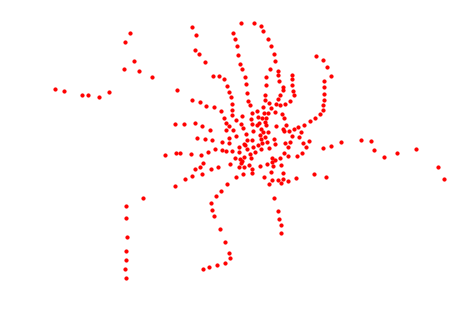

In [24]:
nx.draw(subway_graph, station_geo_new, with_labels=False, node_size=10)

In [25]:
station_connection = defaultdict(list)
for key in line_new.keys():
#     if key != '10号线' and key != '11号线' and key != '5号线':
    print(key)
    for i, sta in enumerate(line_new[key]):
        if i != 0 and i+2 <= len(line_new[key]):
            station_connection[line_new[key][i+1]].extend(line_new[key][i:i+3:2])
        elif i == 0:
            station_connection[line_new[key][i]].append(line_new[key][i+1])
            station_connection[line_new[key][i+1]].extend(line_new[key][i:i+3:2])
# 4号线环线
station_connection['上海体育馆'].append('上海体育场')
station_connection['上海体育场'].append('上海体育馆')

1号线
2号线
3号线
4号线
5号线
6号线
7号线
8号线
9号线
10号线
11号线
12号线
13号线
16号线
17号线
浦江线
5号线支线
10号线支线
11号线支线


In [26]:
station_connection

defaultdict(list,
            {'莘庄': ['外环路', '春申路'],
             '外环路': ['莘庄', '莲花路'],
             '莲花路': ['外环路', '锦江乐园'],
             '锦江乐园': ['莲花路', '上海南站'],
             '上海南站': ['锦江乐园', '漕宝路', '石龙路'],
             '漕宝路': ['上海南站', '上海体育馆', '桂林公园', '龙漕路'],
             '上海体育馆': ['漕宝路', '徐家汇', '宜山路', '上海体育场'],
             '徐家汇': ['上海体育馆', '衡山路', '宜山路', '肇嘉浜路', '交通大学', '上海游泳馆'],
             '衡山路': ['徐家汇', '常熟路'],
             '常熟路': ['衡山路', '陕西南路', '静安寺', '肇嘉浜路'],
             '陕西南路': ['常熟路', '黄陂南路', '上海图书馆', '新天地', '嘉善路', '南京西路'],
             '黄陂南路': ['陕西南路', '人民广场'],
             '人民广场': ['黄陂南路', '新闸路', '南京西路', '南京东路', '大世界', '曲阜路'],
             '新闸路': ['人民广场', '汉中路'],
             '汉中路': ['新闸路', '上海火车站', '南京西路', '曲阜路', '江宁路', '自然博物馆'],
             '上海火车站': ['汉中路', '中山北路', '中潭路', '宝山路', '中潭路', '宝山路'],
             '中山北路': ['上海火车站', '延长路'],
             '延长路': ['中山北路', '上海马戏城'],
             '上海马戏城': ['延长路', '汶水路'],
             '汶水路': ['上海马戏城', '彭浦新村'],
             '彭浦新村': [

In [27]:
w = defaultdict(list)
subway_road = defaultdict(list)
for i in station_geo_new.keys(): 
    w[i] = station_connection[i]
    
for i in w.keys():
    if set(w[i]).issubset(set(station_geo_new.keys())): 
        subway_road[i] = w[i]

In [28]:
subway_road

defaultdict(list,
            {'莘庄': ['外环路', '春申路'],
             '外环路': ['莘庄', '莲花路'],
             '莲花路': ['外环路', '锦江乐园'],
             '锦江乐园': ['莲花路', '上海南站'],
             '上海南站': ['锦江乐园', '漕宝路', '石龙路'],
             '上海体育馆': ['漕宝路', '徐家汇', '宜山路', '上海体育场'],
             '徐家汇': ['上海体育馆', '衡山路', '宜山路', '肇嘉浜路', '交通大学', '上海游泳馆'],
             '衡山路': ['徐家汇', '常熟路'],
             '常熟路': ['衡山路', '陕西南路', '静安寺', '肇嘉浜路'],
             '陕西南路': ['常熟路', '黄陂南路', '上海图书馆', '新天地', '嘉善路', '南京西路'],
             '黄陂南路': ['陕西南路', '人民广场'],
             '人民广场': ['黄陂南路', '新闸路', '南京西路', '南京东路', '大世界', '曲阜路'],
             '新闸路': ['人民广场', '汉中路'],
             '上海火车站': ['汉中路', '中山北路', '中潭路', '宝山路', '中潭路', '宝山路'],
             '中山北路': ['上海火车站', '延长路'],
             '延长路': ['中山北路', '上海马戏城'],
             '上海马戏城': ['延长路', '汶水路'],
             '汶水路': ['上海马戏城', '彭浦新村'],
             '彭浦新村': ['汶水路', '共康路'],
             '共康路': ['彭浦新村', '通河新村'],
             '通河新村': ['共康路', '呼兰路'],
             '呼兰路': ['通河新村', '共富新

In [29]:
su =  nx.Graph(subway_road)

/Users/zhangtingshuo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


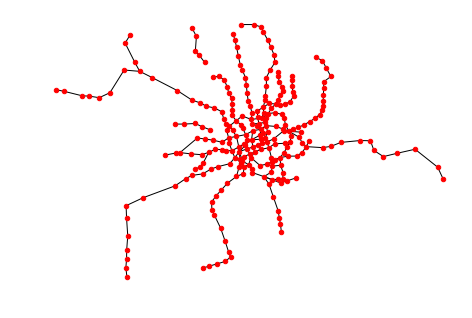

In [30]:
nx.draw(su, station_geo_new, with_labels=False, node_size=20)

In [50]:
def search(start, termination, station_connection, sort_candidate=None):
    pathes = [[start]]
    
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
            
        successors = station_connection[frontier]
            
        for stations in successors: 
            if stations in path: continue
            new_path = path + [stations]
#             new_path = [stations] + path

            pathes.append(new_path)

            if stations == termination: return new_path

        visited.add(frontier)
        
        sort_candidate = sort_candidate or (lambda x : x)

        pathes = sort_candidate(pathes)

In [40]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [42]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [61]:
search('春申路','虹桥火车站',station_connection, sort_candidate=transfer_stations_first)

[['春申路', '莘庄']]
[['春申路', '莘庄'], ['春申路', '银都路']]
[['春申路', '银都路'], ['春申路', '莘庄', '外环路']]
[['春申路', '莘庄', '外环路'], ['春申路', '银都路', '颛桥']]
[['春申路', '银都路', '颛桥'], ['春申路', '莘庄', '外环路', '莲花路']]
[['春申路', '莘庄', '外环路', '莲花路'], ['春申路', '银都路', '颛桥', '北桥']]
[['春申路', '银都路', '颛桥', '北桥'], ['春申路', '莘庄', '外环路', '莲花路', '锦江乐园']]
[['春申路', '莘庄', '外环路', '莲花路', '锦江乐园'], ['春申路', '银都路', '颛桥', '北桥', '剑川路']]
[['春申路', '银都路', '颛桥', '北桥', '剑川路'], ['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站']]
[['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站'], ['春申路', '银都路', '颛桥', '北桥', '剑川路', '东川路']]
[['春申路', '银都路', '颛桥', '北桥', '剑川路', '东川路'], ['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站', '漕宝路']]
[['春申路', '银都路', '颛桥', '北桥', '剑川路', '东川路'], ['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站', '漕宝路'], ['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站', '石龙路']]
[['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站', '漕宝路'], ['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站', '石龙路'], ['春申路', '银都路', '颛桥', '北桥', '剑川路', '东川路', '金平路']]
[['春申路', '莘庄', '外环路', '莲花路', '锦江乐园', '上海南站', '漕宝路'], [

['春申路',
 '莘庄',
 '外环路',
 '莲花路',
 '锦江乐园',
 '上海南站',
 '漕宝路',
 '上海体育馆',
 '徐家汇',
 '交通大学',
 '江苏路',
 '中山公园',
 '娄山关路',
 '威宁路',
 '北新泾',
 '淞虹路',
 '虹桥2号航站楼',
 '虹桥火车站']

In [69]:
a = [([1,2],3),([12,3],3)]

In [70]:
sorted(a,key = lambda x : x[1], reverse=True)

[([1, 2], 3), ([12, 3], 3)]

In [67]:
b.append([2,5])

In [68]:
b

[[1, 2], [2, 3], [2, 5]]

In [64]:
b

[[2, 3]]

In [ ]:
b
